# Step 1: Preprocessing

In [ ]:
import nltk
import re
import numpy as np
import pandas as pd
from nltk.corpus import inaugural

Tap **Brown Corpus**:

In [ ]:
nltk.download('stopwords')
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [ ]:
nltk.corpus.brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Select 3 files for extraction:


*   mystery
*   sci-fi
*   humor



In [ ]:
extract_1 = brown.words(fileids=['cl13']) # mystery
extract_2 = brown.words(fileids=['cm01']) # scifi
extract_3 = brown.words(fileids=['cr06']) # humor

In [ ]:
print("length of mystery extract is:", len(extract_1))
print("length of scifi extract is:", len(extract_2))
print("length of humor extract is:", len(extract_3))

length of mystery extract is: 2405
length of scifi extract is: 2486
length of humor extract is: 2506


In [ ]:
extract_1

['His', 'son', 'watched', 'until', 'he', 'got', 'as', ...]

In [ ]:
extract_1 = ' '.join(brown.words(categories='mystery'))
extract_2 = ' '.join(brown.words(categories='science_fiction'))
extract_3 = ' '.join(brown.words(categories='humor'))

In [ ]:
corpus1 = np.array(extract_1)
corpus2 = np.array(extract_2)
corpus3 = np.array(extract_3)
corpus_all = [extract_1, extract_2, extract_3]

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
# print("length of mystery extract in sentences is:", len(corpus1))
# print("length of scifi extract in sentences is:", len(corpus2))
# print("length of humor extract in sentences is:", len(corpus3))

Normalization:
* lowercase,
* remove punctuation,
* create tokens,
* remove stopwords

In [ ]:
def normalize_document(doc):
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower() # lowercase all characters
    doc = doc.strip() # remove whitespace
    tokens = wpt.tokenize(doc) # tokenize document
    filtered_tokens = [token for token in tokens if token not in stop_words] # filter stopwords out
    doc = ' '.join(filtered_tokens) # re-create document from filtered tokens
    doc = re.sub(r'[^\w\s]', '', doc)
    return doc

In [ ]:
normalize_corpus = np.vectorize(normalize_document)

norm_corpus_all = normalize_corpus(corpus_all)

In [ ]:
# print an example of a preprocess sentence:

print("Example of pre-process sentence from text 1:","\n\n", norm_corpus_all[:1])

Example of pre-process sentence from text 1: 

 ['thirtyeight patients bus morning left hanover disturbed hallucinating interne nurse two attendants charge us felt lonely depressed stared bus window chicagos grim dirty west side seemed incredible listened monotonous drone voices smelled fetid odors coming patients technically ward state illinois going hospital mentally ill suddenly thought mary jane brennan way pretty eyes could flash anger quiet competence gentleness sweetness lay beneath surface defenses become good friends stay cook county hospital told enough offset somewhat damaging stories appeared local newspapers little adventure marshall field co knew lived good address gold coast medical student thinking returning university finish medical studies knew also unmarried without single known relative wasnt quite sure felt enough remorse drinking would return worried read newspaper stories said must loved girl much couldnt meant said wanted kill say asked full booze well drunk apt

## Step 2. Feature Extraction

Execute TF-IDF using TfidfVectorizer:

In [ ]:
# tf-idf rescales words that are common to have less weight
# TdidfVectorizer normalizes term frequencies with 'use_idf = False' and 'smooth_idf = False'

# corpus-all (all text)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_all = vectorizer.fit_transform(norm_corpus_all) # return document-term matrix
X_all_features = vectorizer.get_feature_names_out() # get output feature names for transformation
print(X_all.shape)

(3, 9658)


In [ ]:
# corpus1 example

print(len(norm_corpus_all))
len(X_all_features)

3


9658

Create matirx + array for each TF-IDF matrix

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

model_matrix_all = X_all.toarray()

pd.DataFrame(model_matrix_all.round(2), columns=X_all_features)

,000,10,1105,114,12,13,138,15,1785,1786,...,yuh,yvette,zeitgeist,zigzagging,zipped,zipper,zombie,zone,zoo,zounds
0,0.00,0.00,0.01,0.0,0.01,0.0,0.00,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00
1,0.00,0.01,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.0,...,0.0,0.00,0.00,0.01,0.0,0.0,0.0,0.01,0.00,0.00
2,0.01,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.0,0.01,0.01,0.00,0.0,0.0,0.0,0.00,0.01,0.01


In [ ]:
# what are unique values in model_matrix_all

unique_values1 = np.unique(model_matrix_all)
print(unique_values1.round(2))

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.03 0.03 0.03 0.03 0.03
 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.06 0.06 0.06 0.06
 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06
 0.06 0.06 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
 0.07 

## Step 3. Document Similarity

Measure document similarity across 3 documents

In [ ]:
model_matrix_all.shape

(3, 9658)

In [ ]:
from scipy.spatial import distance

In [ ]:
# Cosine similarity

from sklearn.metrics.pairwise import cosine_similarity

# Calc the cosine similarity between all documents
cosine_similarities = cosine_similarity(model_matrix_all)
cosine_similarities = pd.DataFrame(cosine_similarities)

# add column labels
cosine_similarities.columns = ['mystery', 'sci-fi', 'humor']
# add row labels
cosine_similarities.index = ['mystery', 'sci-fi', 'humor']

print("Cosine Similarity Matrix: \n")
print(cosine_similarities.round(5))

Cosine Similarity Matrix: 

         mystery   sci-fi    humor
mystery  1.00000  0.55648  0.64053
sci-fi   0.55648  1.00000  0.49449
humor    0.64053  0.49449  1.00000


In [ ]:
# Jaccard similarity

binary_matrix = np.where(model_matrix_all > 0, 1, 0)
n = 3 # 3 texts, 3 rows
jaccard_similarities = np.zeros((n, n))

for i in range(n):
    for j in range(n):
      jaccard_dist = distance.jaccard(binary_matrix[i], binary_matrix[j]) # get Jaccard distance
      jaccard_similarities[i][j] = 1 - jaccard_dist  # must subtract Jaccard distance from 1

jaccard_similarities = pd.DataFrame(jaccard_similarities)

# add column labels
jaccard_similarities.columns = ['mystery', 'sci-fi', 'humor']
# add row labels
jaccard_similarities.index = ['mystery', 'sci-fi', 'humor']

# Print the similarity matrix
print("Jaccard Similarity Matrix: \n")
print(jaccard_similarities.round(5))

Jaccard Similarity Matrix: 

         mystery   sci-fi    humor
mystery  1.00000  0.19897  0.23411
sci-fi   0.19897  1.00000  0.18872
humor    0.23411  0.18872  1.00000


In [ ]:
# Euclidean similarity

binary_matrix = np.where(model_matrix_all > 0, 1, 0)
n = 3 # 3 texts, 3 rows
euclidean_similarities = np.zeros((n, n))

for i in range(n):
  for j in range(n):
    euclidean_similarities[i][j] = 1 / (1 + distance.euclidean(model_matrix_all[i], model_matrix_all[j]))
    euclidean_similarities = pd.DataFrame(euclidean_similarities)

# column labels
euclidean_similarities.columns = ['mystery', 'sci-fi', 'humor']
# row labels
euclidean_similarities.index = ['mystery', 'sci-fi', 'humor']

print("Euclidean Similarity Matrix: \n")
print(euclidean_similarities.round(5))

Euclidean Similarity Matrix: 

         mystery   sci-fi    humor
mystery  1.00000  0.51498  0.54115
sci-fi   0.51498  1.00000  0.49863
humor    0.54115  0.49863  1.00000


Perform hierarchical  cluster analysis (cosine similarity)

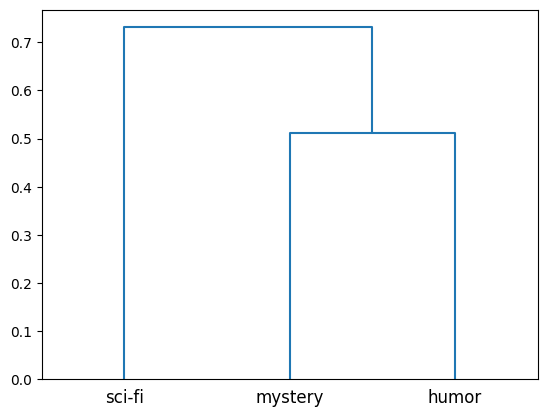

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram

def ward_hierarchical_clustering(feature_matrix):
    # cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_similarities)
    return linkage_matrix

linkage_matrix = ward_hierarchical_clustering(model_matrix_all)
dendrogram(linkage_matrix, labels=['mystery', 'sci-fi', 'humor']);

# Step 4: Discussion

**Question 1: Any differences between cosine, euclidean and jaccard metrics. Do they all show the same results?**

Yes, there are observed differences between the three methods across the three texts (humor, mystery, sci-fi). The Jaccard similarity scores seem the most different, as Cosine and Euclidean are not identical, but the most similar.


**Question 2: Are the results in the dendrogram as, expected or different?**
Personally, yes, I initially figured sci-fi and mystery would be more similar to each other (provided the similar elements in the genres). Given the shorter vertical lines of mystery and humor, this tells that these two genres are actually the most similar. The visualization tells us that there are two clusters, where mystery + humor share one cluster, while sci-fi is the other.
